In [1]:
#importing Libraries
import numpy as np   
np.random.seed(42)   
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline  
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
#for warning
from warnings import filterwarnings
filterwarnings("ignore")  

In [2]:
data = pd.read_csv("C:/Users/praka/Documents/Project Files/Diabetes Dataset (2).csv")

In [3]:
print(data.shape)  
print(data.ndim)   
print(data.size)   
print(data.isna().sum())  
print(data.info())  

(299, 11)
2
3289
Unnamed: 0      0
Unnamed: 0.1    0
Gender          0
Age             0
BMI             0
BloodSugarF     0
BloodSugarPP    0
UrineSugarF     0
UrineSugarPP    0
HbA1c           0
Outcomes        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    299 non-null    int64  
 1   Unnamed: 0.1  299 non-null    int64  
 2   Gender        299 non-null    object 
 3   Age           299 non-null    int64  
 4   BMI           299 non-null    float64
 5   BloodSugarF   299 non-null    int64  
 6   BloodSugarPP  299 non-null    int64  
 7   UrineSugarF   299 non-null    float64
 8   UrineSugarPP  299 non-null    float64
 9   HbA1c         299 non-null    float64
 10  Outcomes      299 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 25.8+ KB
None


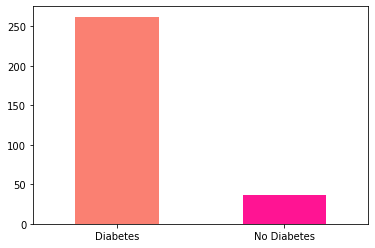

In [4]:
data["Outcomes"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Diabetes', 'No Diabetes'),rotation=0);

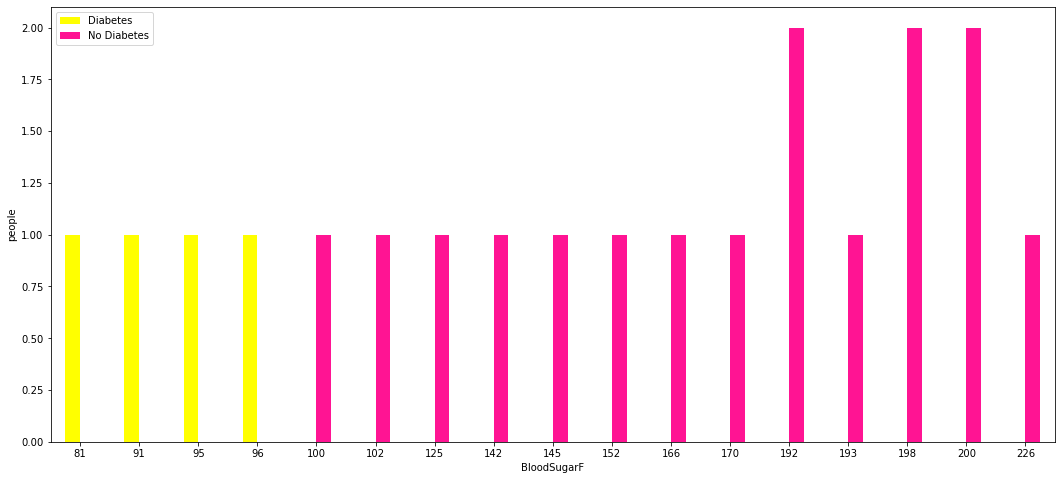

In [5]:
# Comparing Blood Sugar Fasting with the Outcome
pd.crosstab(data.BloodSugarF[::15],data.Outcomes).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['Diabetes', 'No Diabetes']);

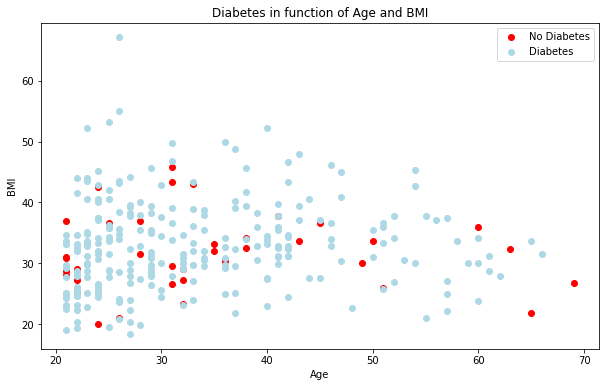

In [6]:
#find out BMI and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcomes==0],data.BMI[data.Outcomes==0],c="Red");
# Scatter with negative example
plt.scatter(data.Age[data.Outcomes==1],data.BMI[data.Outcomes==1],c="lightblue");
# Add some helpful info
plt.title("Diabetes in function of Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Diabetes","Diabetes"]);

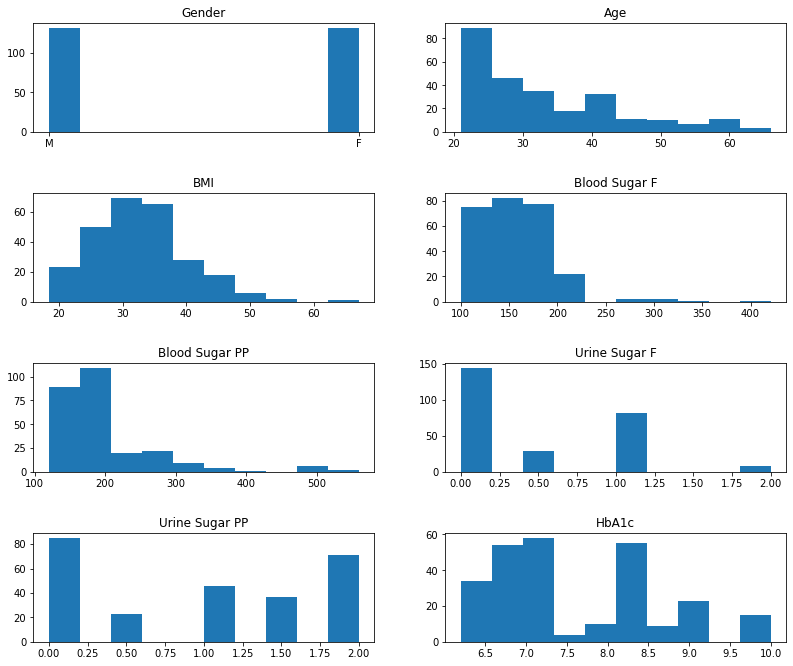

In [7]:
# Histogram of all coloumns when the Outcome is 1(has Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=4.0)
ax[0,0].set_title('Gender')
ax[0,0].hist(data.Gender[data.Outcomes==1]);
ax[0,1].set_title('Age')
ax[0,1].hist(data.Age[data.Outcomes==1]);
ax[1,0].set_title('BMI')
ax[1,0].hist(data.BMI[data.Outcomes==1]);
ax[1,1].set_title('Blood Sugar F')
ax[1,1].hist(data.BloodSugarF[data.Outcomes==1]);
ax[2,0].set_title('Blood Sugar PP')
ax[2,0].hist(data.BloodSugarPP[data.Outcomes==1]);
ax[2,1].set_title('Urine Sugar F')
ax[2,1].hist(data.UrineSugarF[data.Outcomes==1]);
ax[3,0].set_title('Urine Sugar PP')
ax[3,0].hist(data.UrineSugarPP[data.Outcomes==1]);
ax[3,1].set_title('HbA1c')
ax[3,1].hist(data.HbA1c[data.Outcomes==1]);

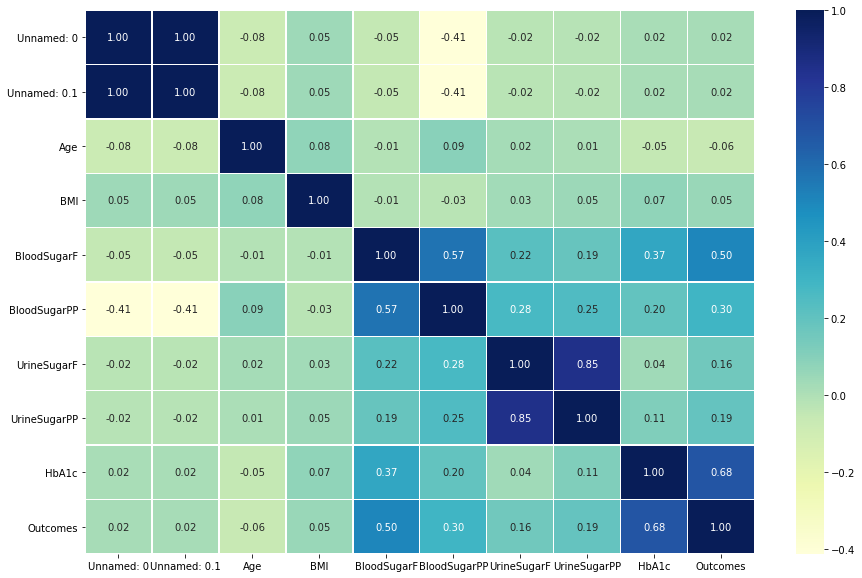

In [8]:
# correlation matrix between columns
## It shows the correlation(positive,neagative) between different columns(only integer value columns) 
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [9]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Age', 'BMI', 'BloodSugarF', 'BloodSugarPP', 'UrineSugarF', 'UrineSugarPP', 'HbA1c']
predicted_class_names = ['Outcomes']

x = data[feature_col_names].values     #predicator faeture columns (8 X m)
y = data[predicted_class_names].values   #predicted class (1=True, 0=False) column (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

In [10]:
print("{0:0.2f}% in trainig set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(data.index)) * 100))

69.90% in trainig set
30.10% in test set


In [11]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

nb_predict_train = nb_model.predict(x_train)
from sklearn import metrics

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.9856



In [12]:
nb_model.fit(x_test, y_test.ravel())

nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 1.0000



In [13]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train);
## Evaluating the model
log_reg = log_reg.score(x_test,y_test)
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train);
## Evaluating the model
knn = knn.score(x_test,y_test)
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(x_train,y_train);
## Evaluating the model
clf = clf.score(x_test,y_test)
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(x_train,y_train)
## Evaluating the model
svm = svm.score(x_test,y_test)

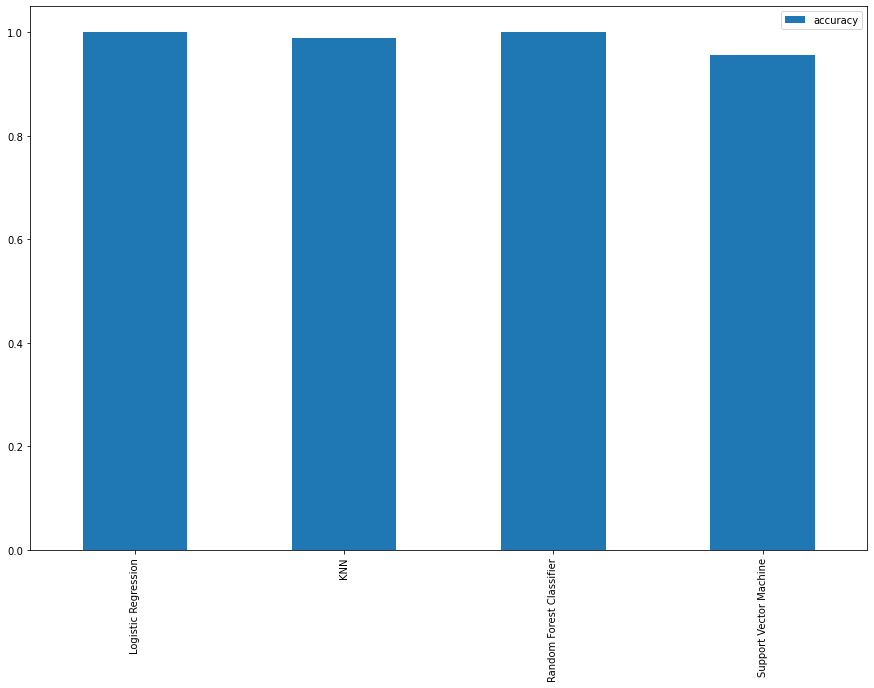

In [14]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,"KNN":knn,"Random Forest Classifier":clf,"Support Vector Machine":svm,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

In [15]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=6,
                                  n_iter=20,
                                  verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)
score = rs_log_reg.score(x_test,y_test)
print(score*100)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


100.0


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.7s finished


In [16]:
log_reg_grid = {'C': np.logspace(-4,4,30),
"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=6,
                           verbose=True)
#fit grid search cv
gs_log_reg.fit(x_train,y_train)
score = gs_log_reg.score(x_test,y_test)
print(score*100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 6 folds for each of 30 candidates, totalling 180 fits
100.0


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.9s finished


In [17]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

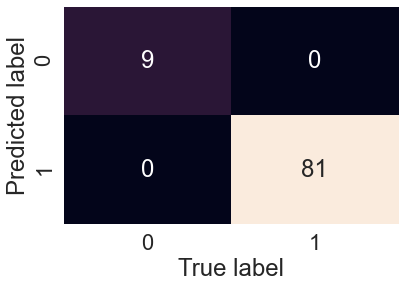

In [18]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print(accuracy_score(y_test,y_preds))

1.0


In [21]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        81

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



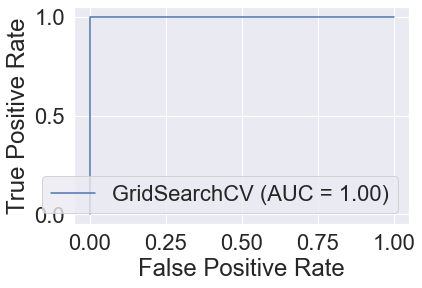

In [22]:
plot_roc_curve(gs_log_reg,x_test,y_test)

In [23]:
import pickle
# Save trained model to file
pickle.dump(gs_log_reg, open("DiabetesDetection.pkl", "wb"))
loaded_model = pickle.load(open("DiabetesDetection.pkl", "rb"))
loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)

1.0

In [24]:
from IPython.display import HTML
HTML(filename='C:/Users/praka/Documents/Project Files/templates/home.html')

In [ ]:
from flask import Flask,request, url_for, redirect, render_template  ## importing necessary libraries
import pickle  ## pickle for loading model(Diabetes.pkl)
import pandas as pd  ## to convert the input data into a dataframe for giving as a input to the model

app = Flask('__name__', template_folder= 'templates')  ## setting up flask name

model = pickle.load(open("DiabetesDetection.pkl", "rb"))  ##loading model


@app.route('/')             ## Defining main index route
def home():
    return render_template("home.html")   ## showing index.html as homepage


@app.route('/predict',methods=['POST','GET'])  ## this route will be called when predict button is called
def predict(): 
    #int_features=[float(x) for x in request.form.values()]
    text1 = request.form['1']      ## Fetching each input field value one by one
    text2 = request.form['2'] 
    text3 = request.form['3']
    text4 = request.form['4']
    text5 = request.form['5']
    text6 = request.form['6']
    text7 = request.form['7']
    text8 = request.form['8']
 
    row_df = pd.DataFrame([pd.Series([text1,text2,text3,text4,text5,text6,text7,text8])])  ### Creating a dataframe using all the values
    print(row_df)
    prediction=model.predict_proba(row_df) ## Predicting the output
    output='{0:.{1}f}'.format(prediction[0][1], 2)    ## Formating output

    if output>str(0.5):
        return render_template('home.html',pred='You have chance of having diabetes.\nProbability of having Diabetes is {}'.format(output)) ## Returning the message for use on the same index.html page
    else:
        return render_template('home.html',pred='You are safe.\n Probability of having diabetes is {}'.format(output)) 




if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)          ## Running the app as debug==True

 * Serving Flask app "__name__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Apr/2022 21:45:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2022 21:45:35] "GET /static/css/materialize.css HTTP/1.1" 404 -
127.0.0.1 - - [08/Apr/2022 21:45:35] "GET /static/css2/style.css HTTP/1.1" 404 -
127.0.0.1 - - [08/Apr/2022 21:45:35] "GET /.js/materialize.js HTTP/1.1" 404 -
127.0.0.1 - - [08/Apr/2022 21:45:36] "GET /js/init.js HTTP/1.1" 404 -
127.0.0.1 - - [08/Apr/2022 21:45:36] "GET /favicon.ico HTTP/1.1" 404 -
